# Multiple Linear Regression

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns = ["Unnamed: 0", "month", "year"], axis = 1, inplace = True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

### Visualization

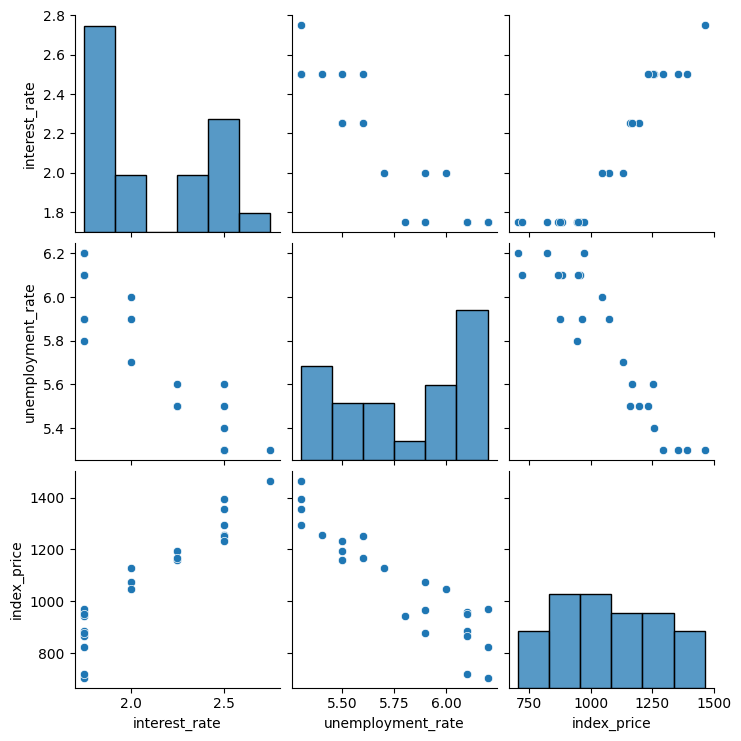

In [9]:
sns.pairplot(df)

Text(0, 0.5, 'unemployment_rate')

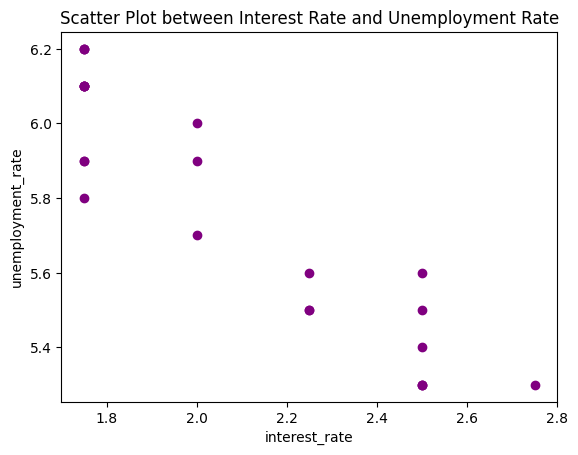

In [15]:
plt.scatter(df["interest_rate"], df["unemployment_rate"], color='purple')
plt.title("Scatter Plot between Interest Rate and Unemployment Rate")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [18]:
### Get my Independent and dependent values

X = df[['interest_rate', 'unemployment_rate']]
Y = df["index_price"]

In [19]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

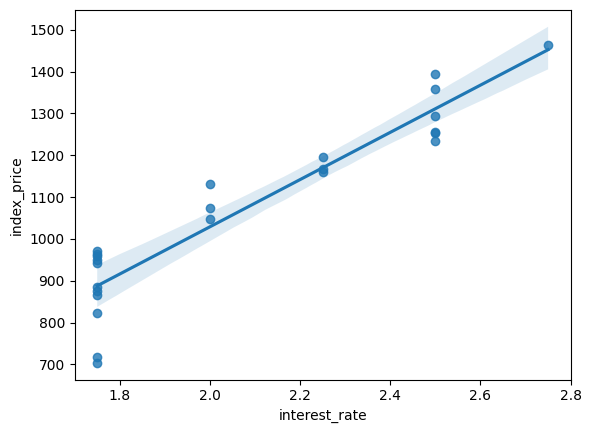

In [23]:
sns.regplot(x=df["interest_rate"], y=df["index_price"])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

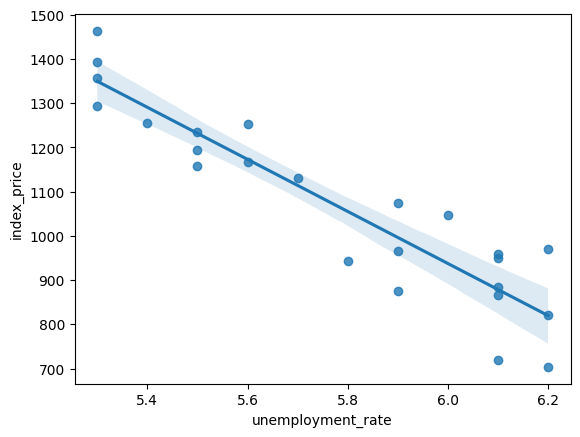

In [24]:
sns.regplot(x=df["unemployment_rate"], y=df["index_price"])

In [25]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.fit_transform(X_test)

In [29]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [31]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
validation_score = cross_val_score(
    regression, X_train, Y_train, scoring="neg_mean_squared_error", cv=3
)

In [35]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [39]:
## Prediction
Y_pred = regression.predict(X_test)

In [40]:
## Performance Metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 8108.567426306604
MAE: 73.80444932337097
RMSE: 90.04758423359621
R2 Score: 0.7591371539010257


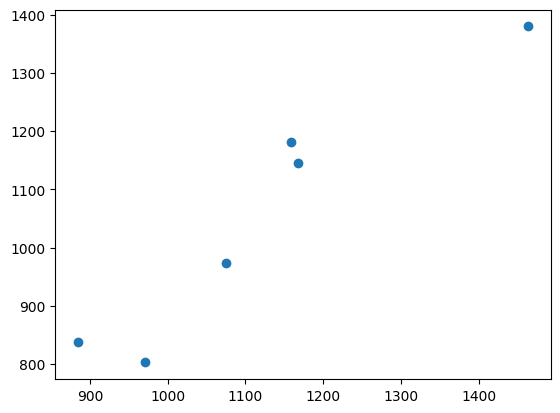

In [41]:
## Assumption
plt.scatter(Y_test, Y_pred)

In [42]:
residuals = Y_test- Y_pred

In [43]:
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


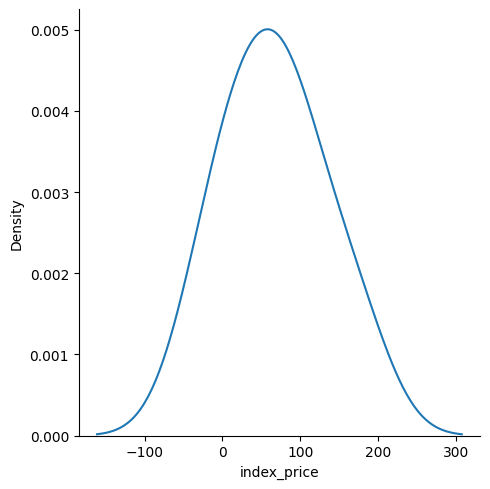

In [45]:
sns.displot(residuals, kind = 'kde')

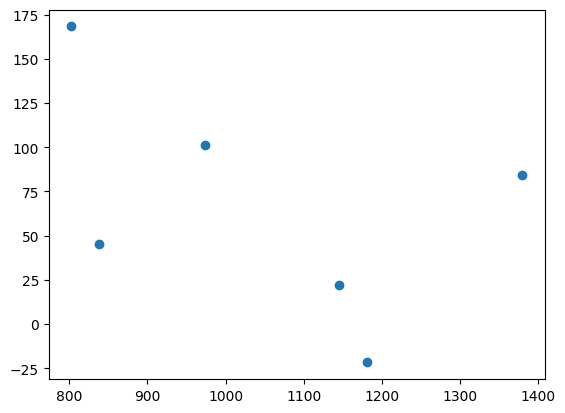

In [46]:
## Scatter Plot wrt residuals and predictions
plt.scatter(Y_pred, residuals)

In [50]:
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 14 Sep 2025   Prob (F-statistic):                       0.754
Time:                        13:41:20   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------